# Recommendations to Stakeholder

- Assumption: We assume subscribers are customers who subscribe to the Bike-Share program for a monthly fixed fee while non-subscribers are customers who pay for each bike trip.

- Given our analysis below, we recommend the following changes to the stakeholder:
    1. **Effective Targeting of Non-Subscribers**: As you will see see in our customer segmentation section in our analysis, the the volume of subscriber trips is much higher than the volume of non-subscriber trips during the weekday. Furthermore, the volume of subscriber trips is significantly higher than the volume of non-subscriber trips during peak hours (7-9, 17 - 19). As a means to increase volume of non-subscriber trips, we suggest to target bike-share stations that have signficantly lower volume of customers than subscribers by offering promtional short-term subscriptions such as a 5 day tourist subscription or a buy one trip get one free promotion. These suggestions as well will help to generate customer retention and a conversion to subscription. 
    2. **Two Part Pricing Model**: Since there is a higher demand for bikes during rush hour, we recommend creating a two part pricing model for peak vs. off-peak hours. For this model, we would set up a higher price for a trip during peak hours.
    3. **Inventory Strategy Postion**: Even though bikes are the most in demand during rush hour, the mean duration of the trip is generally smaller during rush hour time (6 - 9, 17 - 19) than the mean duration during non rush hour time. We suggest to the stakeholder to monitor the bike availability during peak hours and make sure it has the means to stock up bike inventory when inventory is low.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')
%matplotlib inline 

/Users/michaelosorio/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Load Dataset

In [2]:
df = pd.read_csv('201408_trip_data.csv')
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,432946,406,8/31/2014 22:31,Mountain View Caltrain Station,28,8/31/2014 22:38,Castro Street and El Camino Real,32,17,Subscriber,94040
1,432945,468,8/31/2014 22:07,Beale at Market,56,8/31/2014 22:15,Market at 4th,76,509,Customer,11231
2,432944,534,8/31/2014 22:06,Beale at Market,56,8/31/2014 22:15,Market at 4th,76,342,Customer,11231
3,432942,1041,8/31/2014 21:45,Embarcadero at Sansome,60,8/31/2014 22:02,Steuart at Market,74,603,Customer,94521
4,432941,1091,8/31/2014 21:44,Embarcadero at Sansome,60,8/31/2014 22:02,Steuart at Market,74,598,Customer,94521


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171792 entries, 0 to 171791
Data columns (total 11 columns):
Trip ID            171792 non-null int64
Duration           171792 non-null int64
Start Date         171792 non-null object
Start Station      171792 non-null object
Start Terminal     171792 non-null int64
End Date           171792 non-null object
End Station        171792 non-null object
End Terminal       171792 non-null int64
Bike #             171792 non-null int64
Subscriber Type    171792 non-null object
Zip Code           171581 non-null object
dtypes: int64(5), object(6)
memory usage: 14.4+ MB


In [4]:
def hr_func(ts):
    return ts.hour
# Add Start Hour Column
df['Start Hour'] = pd.to_datetime(df['Start Date']).apply(hr_func)
# Add Day of Week Column
df['Day of Week'] = pd.to_datetime(df['Start Date']).dt.dayofweek

In [5]:
# df['Duration'].plot(kind='bar', alpha=0.85, figsize = (20,12))

# Top 10 Start BikeShare Stations

* As we can see in the figure below the top 10 start stations are:
    1. San Francisco Caltrain (Townsend at 4th)
    2. Harry Bridges Plaza (Ferry Building)
    3. Embarcadero at Sansome
    4. San Francsico Caltrain 2 (330 Townsend)
    5. 2nd at Townsend
    6. Market at Sansome
    7. Temporary Transbay Terminal (Howard at Beale)
    8. Steuart at Market
    9. Townsend at 7th
    10. Market at 4th

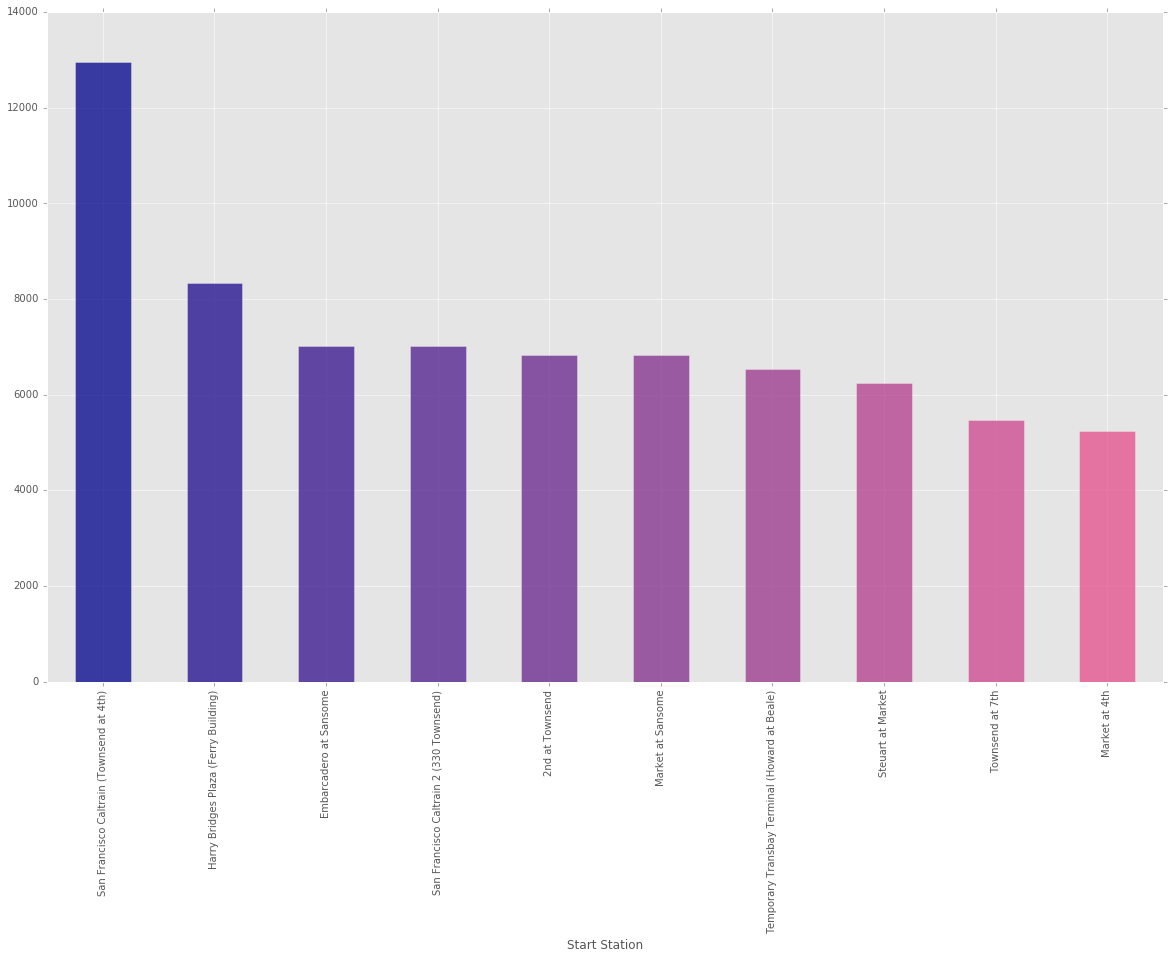

In [6]:
start_stations = df.groupby('Start Station').size()
top10_start = start_stations.nlargest(10)
my_colors = [(x/10.0, x/30.0, 0.55) for x in range(len(top10_start))]
top10_start.plot(kind = 'bar', figsize = (20, 12), color=my_colors, alpha = 0.75)

# Top 10 Bike Share End Stations

- As we can see in the figure below the top 10 end stations are:
    1. San Francisco Caltrain (Townsend at 4th)
    2. Embarcadero at Sansome
    3. Harry Bridges Plaza (Ferry Building)
    4. Market at Sansome
    5. San Francisco Caltrain 2 (330 Townsend)
    6. 2nd at Townsend
    7. Steuart at Market
    8. Townsend at 7th
    9. Temporary Transbay Terminal (Howard at Beale)
    10. Powell Street BART

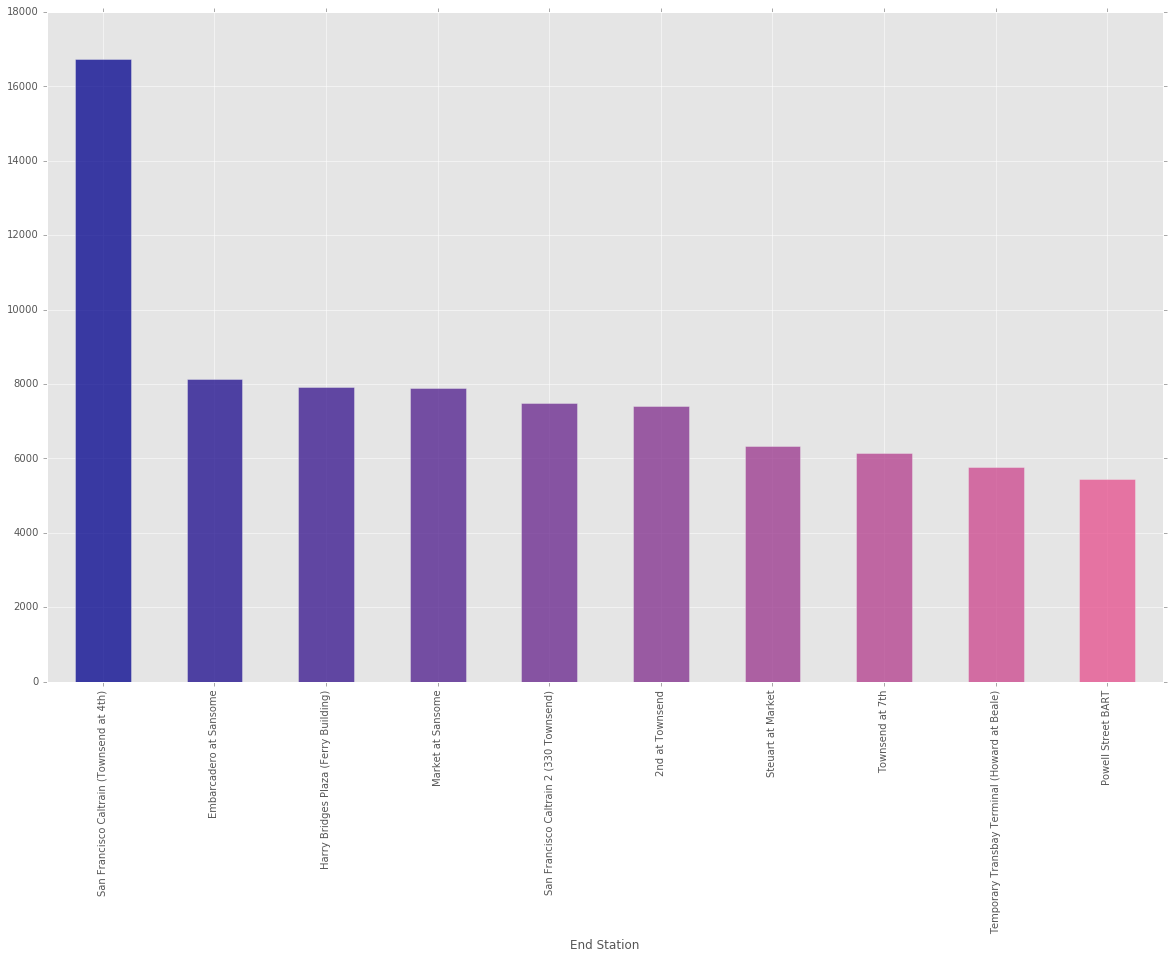

In [7]:
end_stations = df.groupby('End Station').size()
top10_end = end_stations.nlargest(10)
top10_end.plot(kind = 'bar', figsize = (20, 12), color=my_colors, alpha = 0.75)

# Top 10 Destinations from SF Caltrain Station

- It seems that the San Francisco Caltrain (Townsend at 4th) was by far the most common start station. Let’s determine which end stations, for trips starting from the SF Caltrain Townsend station, were the most popular.
- The top 10 destination from SF Caltrain Station are:
    1. Temporary Transbay Terminal (Howard at Beale)
    2. Market at Sansome
    3. Steuart at Market
    4. Embarcadero at Folsolm
    5. Harry Bridges Plaza (Ferry Building)
    6. Yerba Buena Center of the Arts (3rd @ Howard)
    7. Townsend at 7th
    8. Howard at 2nd
    9. Davis at Jackson
    10. 2nd at Townsend
- As we can see, the most popular trips starting from the SF Caltrain station are in fairly close proximity to the station, with most of the destinations being clustered around the Financial District and SOMA, which is where a lot of office buildings are. Thus, the Bike-share users who use these popular routes are likely to be work commuters.

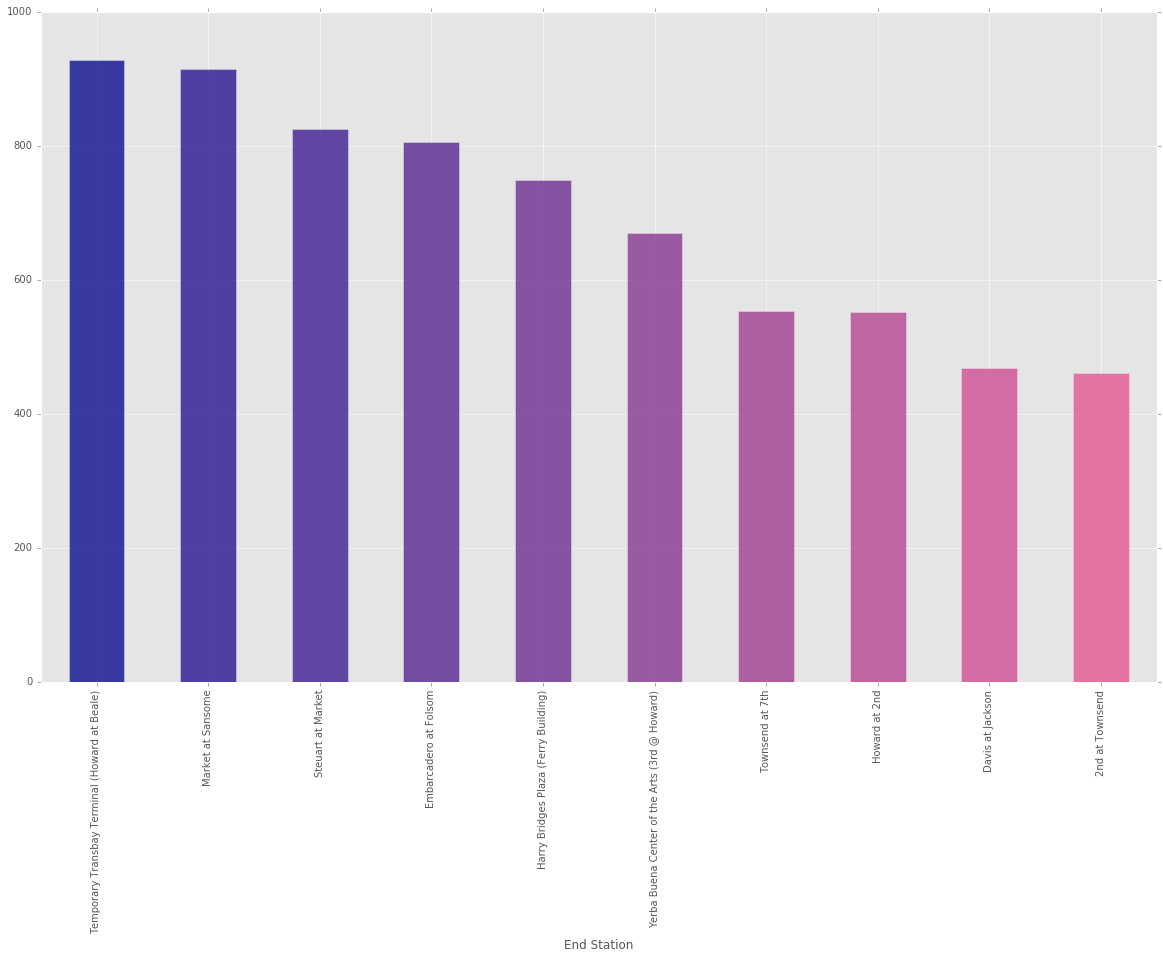

In [8]:
caltrain4th_routes = df[df['Start Station'] == 'San Francisco Caltrain (Townsend at 4th)']
result = caltrain4th_routes.groupby('End Station').size()
top10_caltrain4th_routes = result.nlargest(10)
top10_caltrain4th_routes.plot(kind = 'bar', figsize = (20, 12), color=my_colors, alpha = 0.75)

# Daily Peak Usage By Hour at SF Caltrain Station

- We dug further into the trip data of any Bike-share station of our choice and calculated the total number of trips and average duration (in minutes) of those trips, grouped by hour. 
- The first figure below displays Number of Trips vs. Hour of day. As we can see, bikes are the most in demand during rush hour hours (6 - 9, 17 - 19).
- Since we are dealing with several numeric dimensions of data, we visualized the results using a scatterplot graph, with the hour as the x-axis, number of trips as the y-axis, and the average duration as the scatterplot size. This visualization is displayed on the second figure below.
- As we can see in the second figure, the mean duration is smaller during rush hour time (6 - 9, 17 - 19) than the mean duration during non rush hour time. 

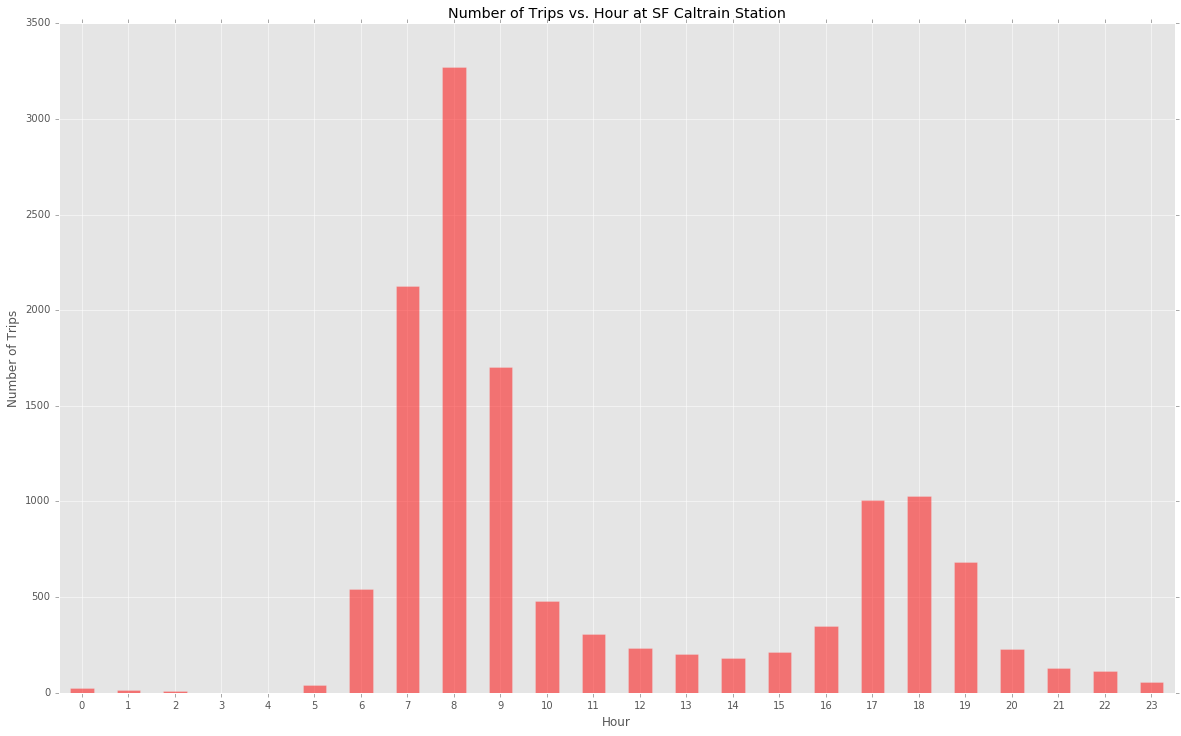

In [9]:
daily_peak_usage = caltrain4th_routes.groupby('Start Hour')['Duration'].aggregate(['mean', 'size'])
daily_peak_usage['size'].plot(kind = 'bar', color = 'red', figsize = (20, 12), rot = 0, alpha = 0.5)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs. Hour at SF Caltrain Station')

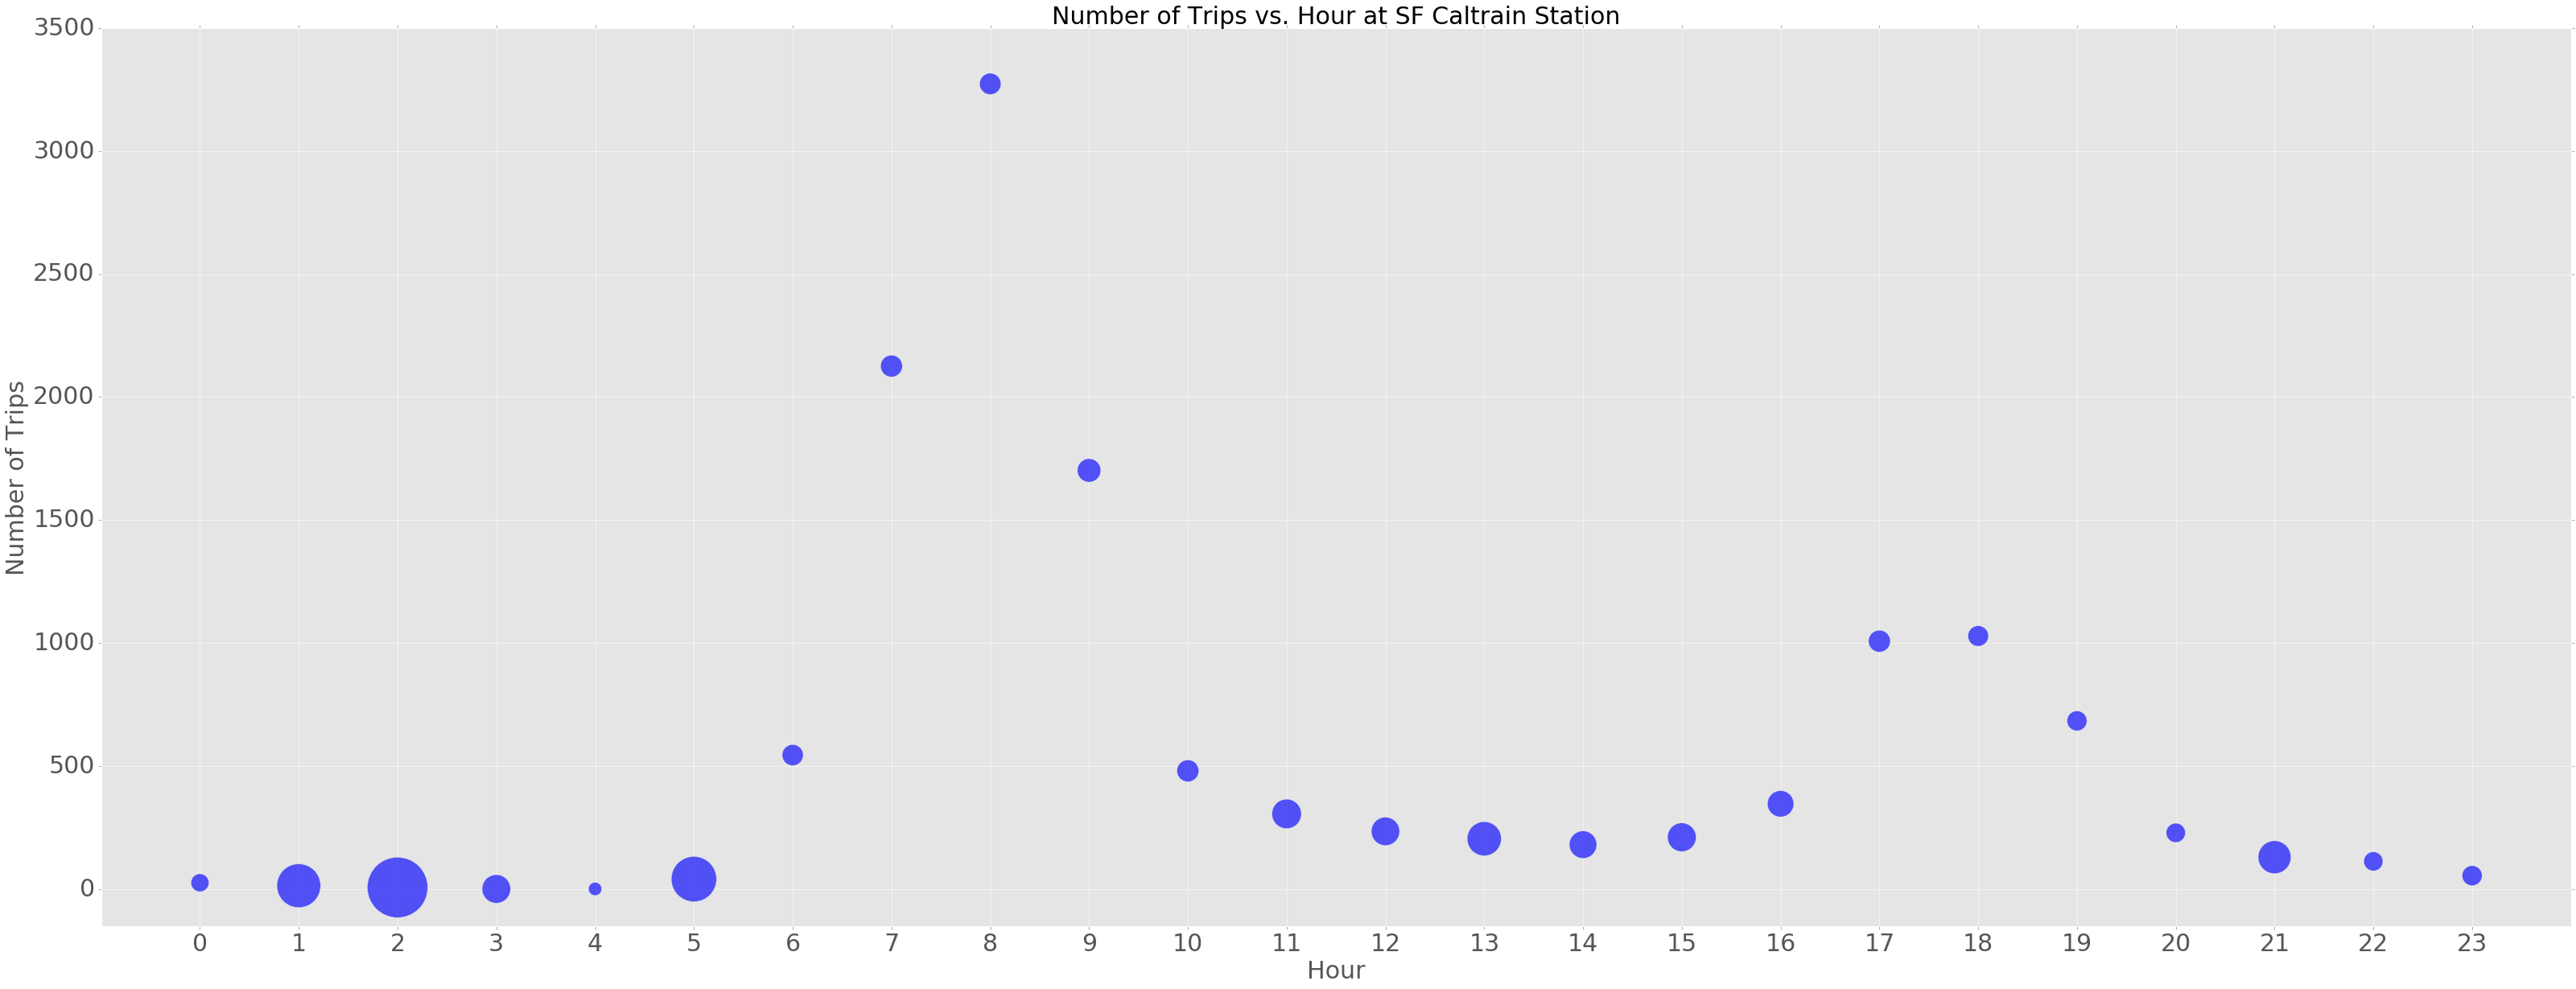

In [10]:
plt.figure(figsize=(55, 20))
plt.scatter(x = daily_peak_usage.index.values, y = daily_peak_usage['size'].values, s = daily_peak_usage['mean'].values, alpha = 0.65)
x1,x2,y1,y2 = plt.axis()
plt.axis(( -1, 24, -150, y2))
plt.xlabel('Hour', fontsize = 30)
plt.ylabel('Number of Trips', fontsize = 30)
plt.xticks(daily_peak_usage.index.values, fontsize = 30)
plt.yticks(fontsize = 30)
plt.title('Number of Trips vs. Hour at SF Caltrain Station', fontsize = 30)

# Usage By Day of Week at SF Caltrain Station

- As we can see in the figure below, the number of bike trips tends to fall during the weekend.

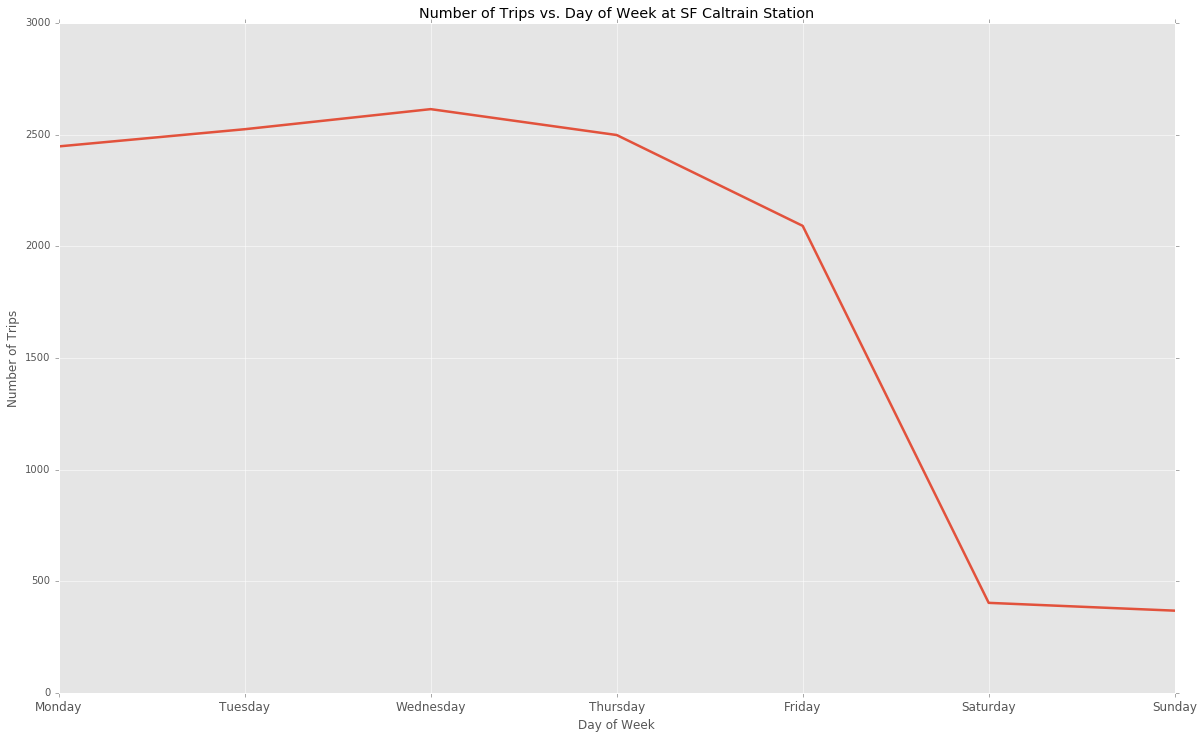

In [11]:
weekly_usage = caltrain4th_routes.groupby('Day of Week')['Duration'].size()
weekly_usage.plot(alpha = 0.95, figsize = (20, 12), rot = 0, linewidth = 2.5)
plt.xticks(weekly_usage.index.values, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize = 12)
plt.xlabel('Day of Week') 
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs. Day of Week at SF Caltrain Station')

# Top 10 Destinations from Ferry Building

- We carried a similar analyis of daily peak usage and day of week usage for the Ferry Building Bike Share station.

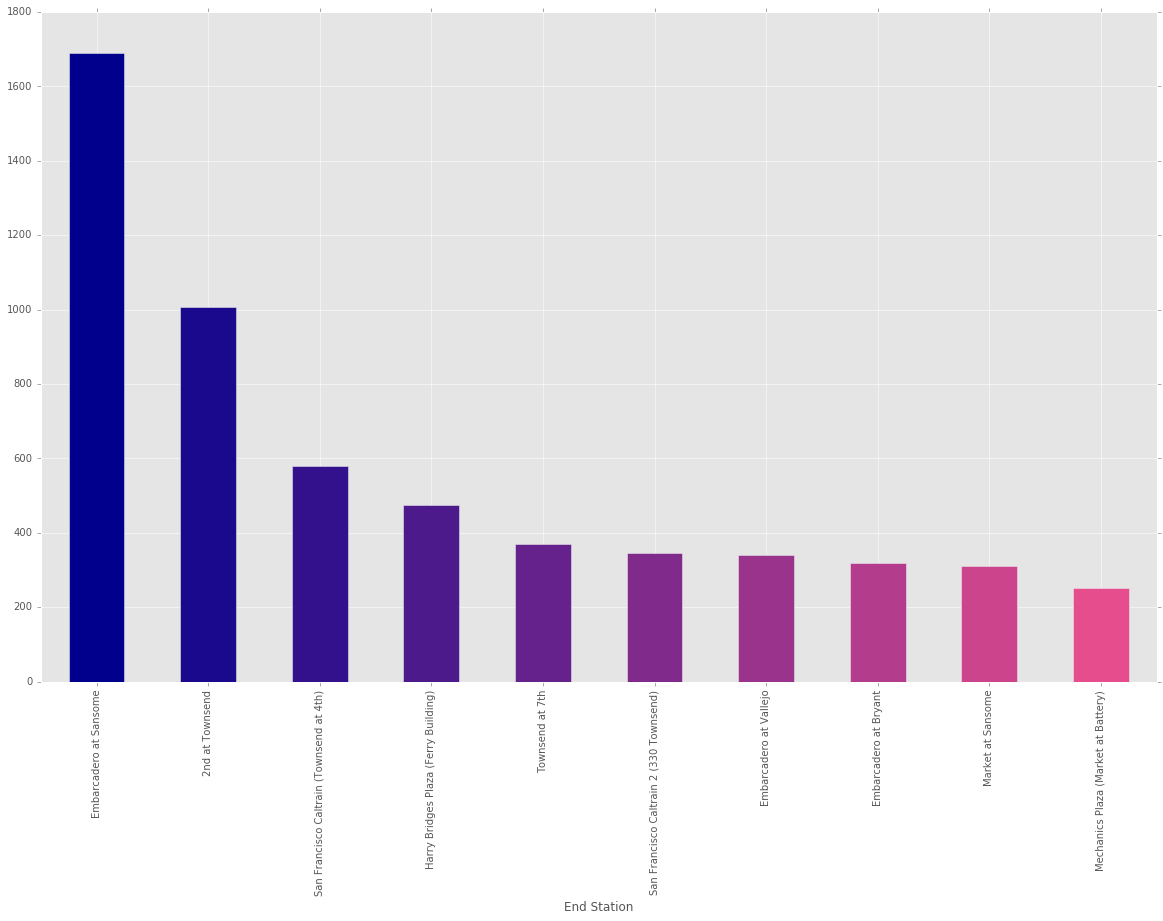

In [12]:
trips_by_station = df.groupby('Start Station').size()
ferryBuilding_routes = df[df['Start Station'] == 'Harry Bridges Plaza (Ferry Building)']
result = ferryBuilding_routes.groupby('End Station').size()
top10_ferryBuilding_routes = result.nlargest(10)
top10_ferryBuilding_routes.plot(kind = 'bar', figsize = (20, 12), color=my_colors)

# Daily Peak Usage By Hour at Ferry Building

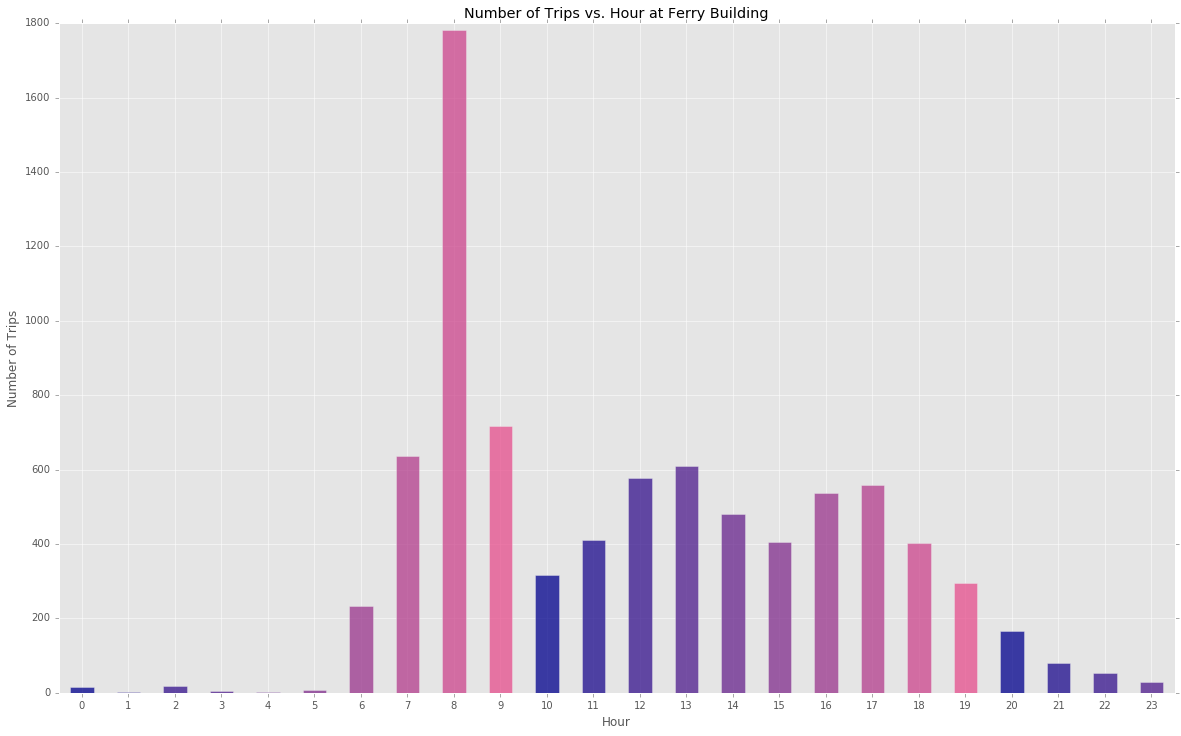

In [13]:
daily_peak_usage = ferryBuilding_routes.groupby('Start Hour')['Duration'].aggregate(['mean', 'size'])
daily_peak_usage['size'].plot(kind = 'bar', color = my_colors, figsize = (20, 12), rot = 0, alpha = 0.75)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs. Hour at Ferry Building')

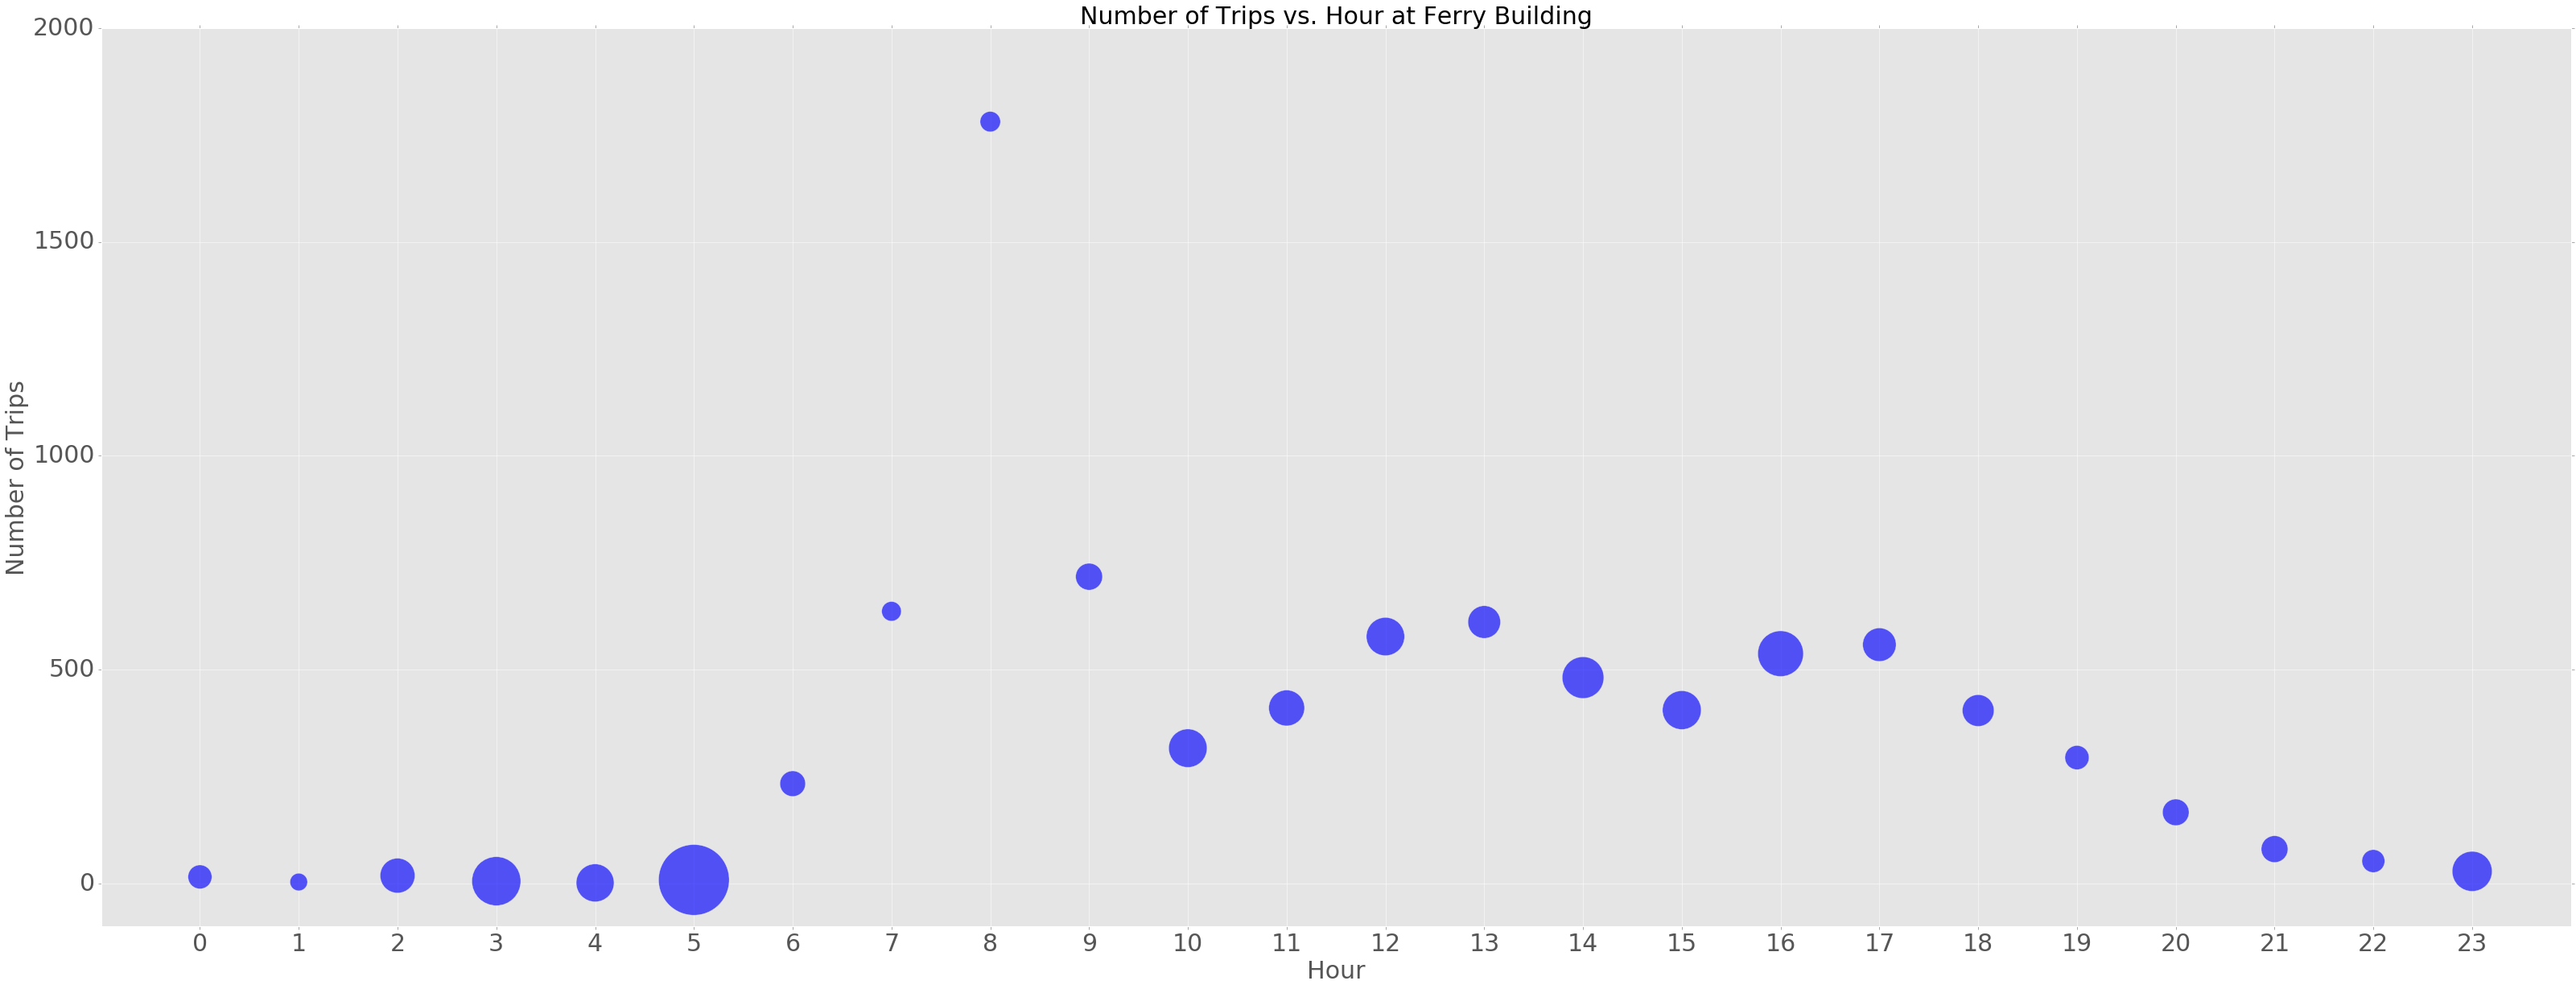

In [14]:
plt.figure(figsize=(55, 20))
plt.scatter(x = daily_peak_usage.index.values, y = daily_peak_usage['size'].values, s = daily_peak_usage['mean'].values, alpha = 0.65)
x1,x2,y1,y2 = plt.axis()
plt.axis(( -1, 24, -100, y2))
plt.xlabel('Hour', fontsize = 30)
plt.ylabel('Number of Trips', fontsize = 30)
plt.xticks(daily_peak_usage.index.values, fontsize = 30)
plt.yticks(fontsize = 30)
plt.title('Number of Trips vs. Hour at Ferry Building', fontsize = 30)

# Usage By Day of Week at Ferry Building

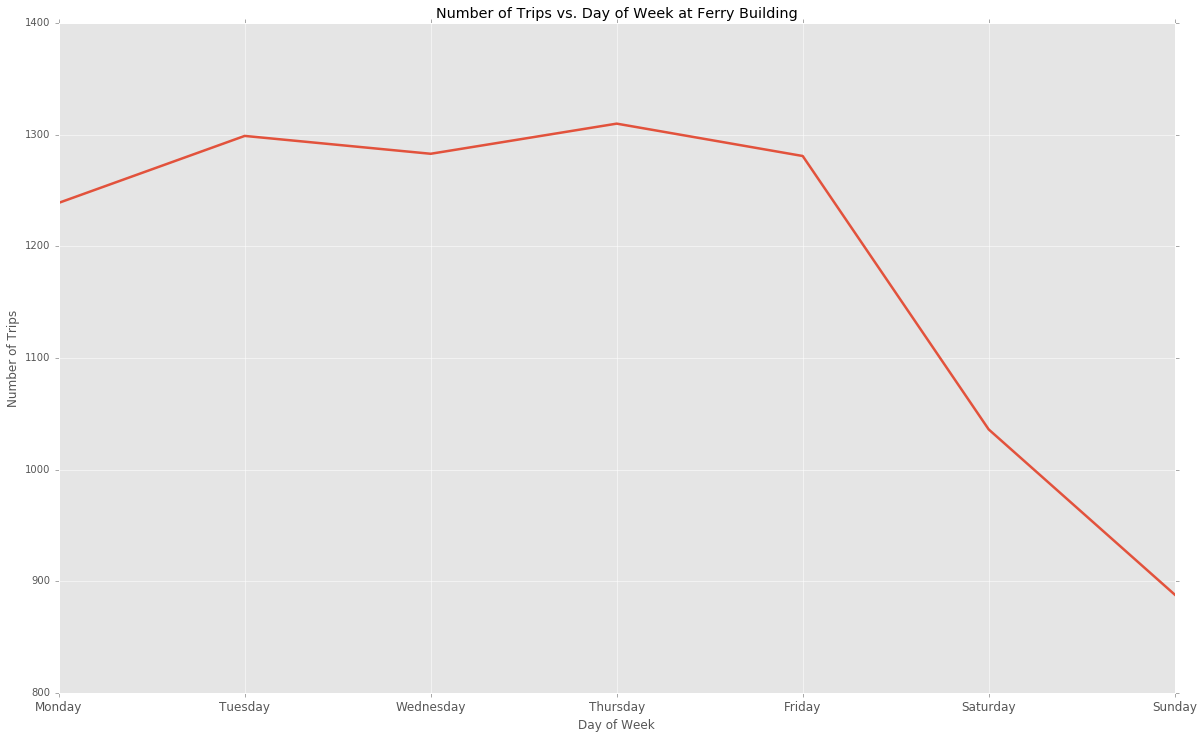

In [15]:
weekly_usage = ferryBuilding_routes.groupby('Day of Week')['Duration'].size()
weekly_usage.plot(alpha = 0.95, figsize = (20, 12), rot = 0, linewidth = 2.5)
plt.xticks(weekly_usage.index.values, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize = 12)
plt.xlabel('Day of Week') 
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs. Day of Week at Ferry Building')

# Customer Segmentation

- Assumption: We assume subscribers are customers who subscribe to the Bike-Share program for a monthly fixed fee while non-subscribers are customers who pay for each bike trip.
- As can see in the table below, there is a higher volume of Subscribers than Non-Subscribers.
- The most interesting result from this table is that the mean duration of bike trips for subscribers is signficantly less than the mean duration of bike trips for non-subscribers. From this datapoint, we can infer that a subscription service may be popular amongst commuters who bike to work. 
- The first figure reveals that the volume of subscriber trips is significantly higher than the volume of non-subscriber trips during peak hours (7-9, 17 - 19). For non-peak hours, the gap between these two groups becomes smaller.
- As we can see in second figure below, the volume of subscriber trips is much higher than the volume of non-subscriber trips during the weekday. However, the volume of subscriber trips is slightly smaller than the volume of non-subscriber trips during the weekend. This provides further evidence that the subscription service is popular amongst work commuters since work commuters generally do not work on the weekends.
- The third figure below reveals that mean duration of trips for both subscribers and non-subscribers tend to increase during the weekend.

In [16]:
result = df.groupby('Subscriber Type')['Duration'].aggregate(['mean', 'size'])
result

,mean,size
Subscriber Type,,
Customer,3891.034798,28910
Subscriber,574.369564,142882


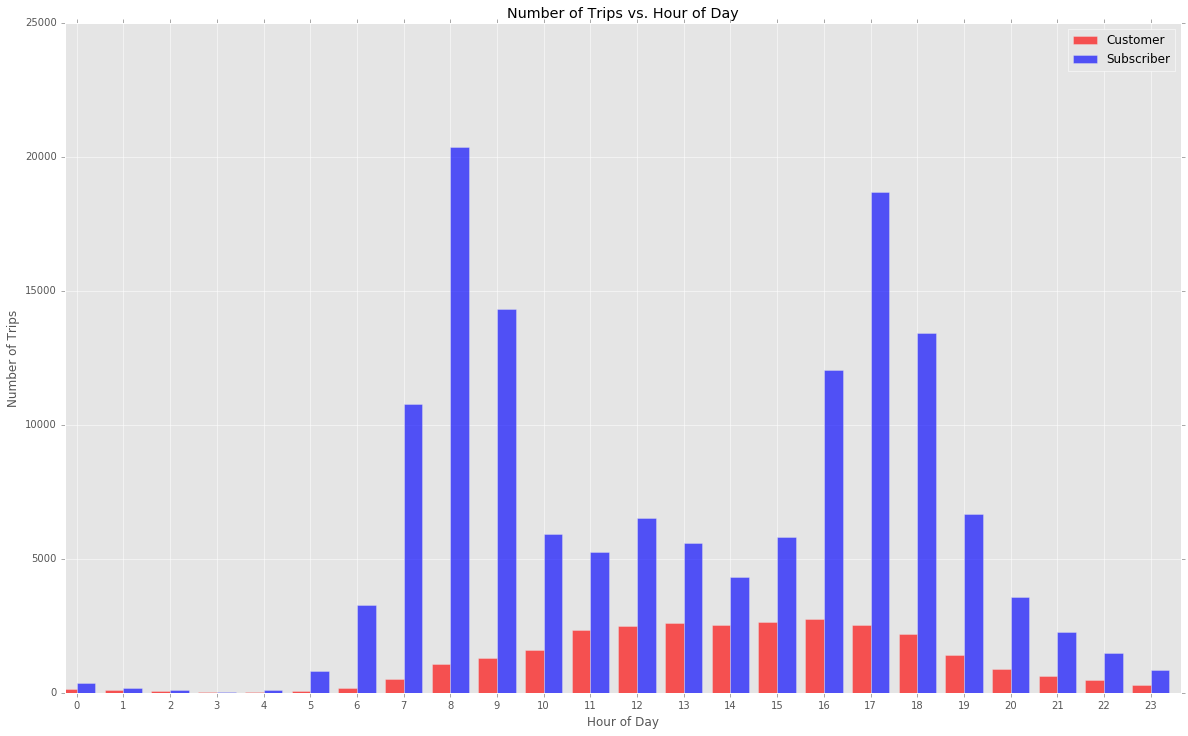

In [17]:
result = df.groupby(['Subscriber Type', 'Start Hour'])['Duration'].aggregate(['mean', 'size'])
fig = plt.figure(figsize = (20, 12))
width = 0.4
result.ix['Customer']['size'].plot(kind='bar', color='red', width=width, position=1, rot = 0, label = 'Customer', alpha = 0.65)
result.ix['Subscriber']['size'].plot(kind='bar', color='blue', width=width, position=0, rot = 0, label = 'Subscriber', alpha = 0.65)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs. Hour of Day')
plt.legend()
plt.show()

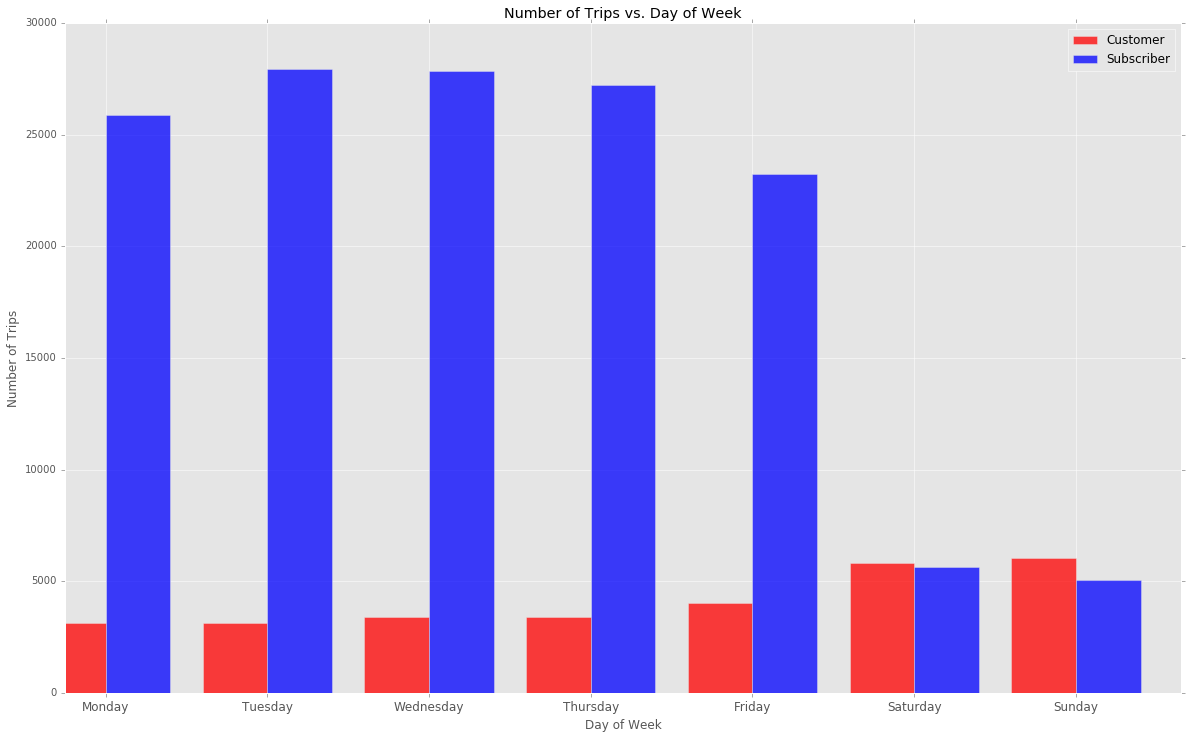

In [18]:
result = df.groupby(['Subscriber Type', 'Day of Week'])['Duration'].aggregate(['mean', 'size'])
fig = plt.figure(figsize = (20, 12))
width = 0.4
result.ix['Customer']['size'].plot(kind='bar', color='red', width=width, position=1, rot = 0, label = 'Customer', alpha = 0.75)
result.ix['Subscriber']['size'].plot(kind='bar', color='blue', width=width, position=0, rot = 0, label = 'Subscriber', alpha = 0.75)
plt.xticks(weekly_usage.index.values, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize = 12)
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs. Day of Week')
plt.legend()
plt.show()

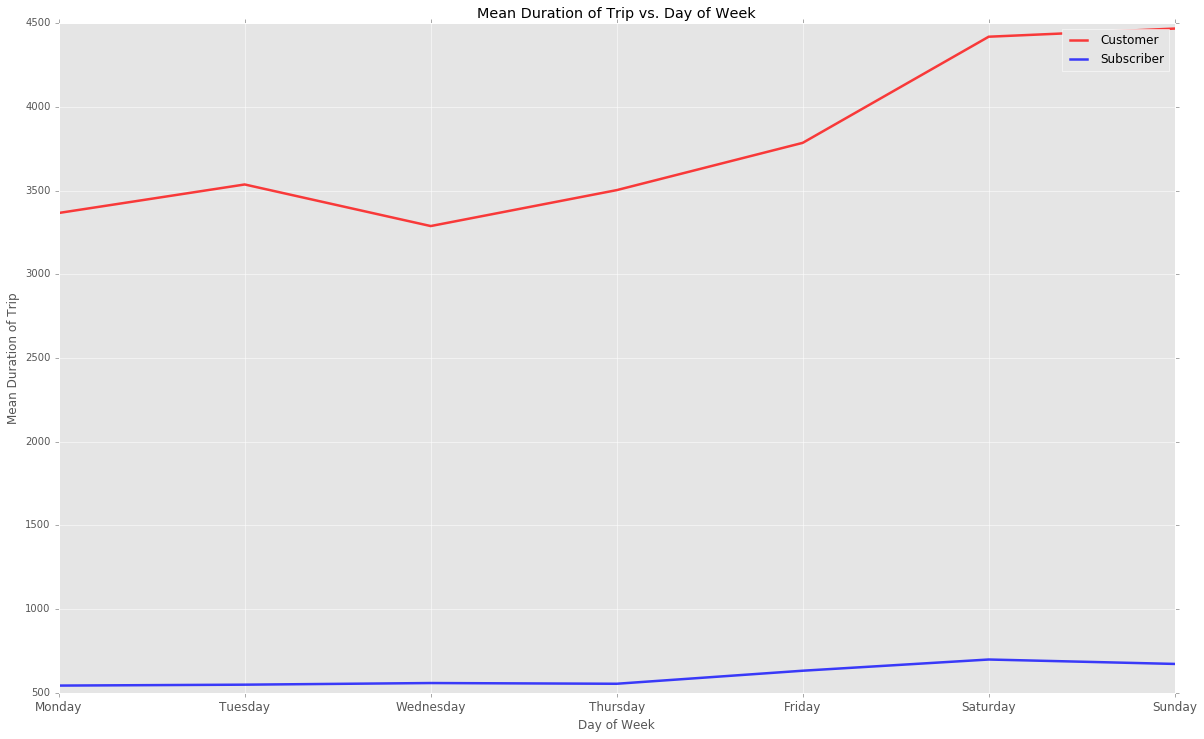

In [19]:
plt.figure(figsize = (20, 12))
result.ix['Customer']['mean'].plot(color='red', rot = 0, label = 'Customer', linewidth = 2.5, alpha = 0.75)
result.ix['Subscriber']['mean'].plot(color='blue', rot = 0, label = 'Subscriber', linewidth = 2.5, alpha = 0.75)
plt.legend()
plt.ylabel('Mean Duration of Trip')
plt.xticks(weekly_usage.index.values, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize = 12)
plt.title('Mean Duration of Trip vs. Day of Week')